In [29]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt


In [30]:
# read file
df_original=pd.read_csv("bank.csv",delimiter=";")

df =df_original
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [31]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [32]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [35]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [37]:
df.drop(['marital','contact','month'], axis=1,inplace=True)

In [38]:
df.head()

age          job  education default  balance housing loan  day  duration  \
0   30   unemployed    primary      no     1787      no   no   19        79   
1   33     services  secondary      no     4789     yes  yes   11       220   
2   35   management   tertiary      no     1350     yes   no   16       185   
3   30   management   tertiary      no     1476     yes  yes    3       199   
4   59  blue-collar  secondary      no        0     yes   no    5       226   

   campaign  pdays  previous poutcome   y  
0         1     -1         0  unknown  no  
1         1    339         4  failure  no  
2         1    330         1  failure  no  
3         4     -1         0  unknown  no  
4         1     -1         0  unknown  no

In [39]:
df.replace(['yes','no'],[1,0],inplace=True)
df.head()

age          job  education  default  balance  housing  loan  day  \
0   30   unemployed    primary        0     1787        0     0   19   
1   33     services  secondary        0     4789        1     1   11   
2   35   management   tertiary        0     1350        1     0   16   
3   30   management   tertiary        0     1476        1     1    3   
4   59  blue-collar  secondary        0        0        1     0    5   

   duration  campaign  pdays  previous poutcome  y  
0        79         1     -1         0  unknown  0  
1       220         1    339         4  failure  0  
2       185         1    330         1  failure  0  
3       199         4     -1         0  unknown  0  
4       226         1     -1         0  unknown  0

In [40]:
df = pd.get_dummies(df)
df.head()    

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   30        0     1787        0     0   19        79         1     -1   
1   33        0     4789        1     1   11       220         1    339   
2   35        0     1350        1     0   16       185         1    330   
3   30        0     1476        1     1    3       199         4     -1   
4   59        0        0        1     0    5       226         1     -1   

   previous        ...         job_unemployed  job_unknown  education_primary  \
0         0        ...                      1            0                  1   
1         4        ...                      0            0                  0   
2         1        ...                      0            0                  0   
3         0        ...                      0            0                  0   
4         0        ...                      0            0                  0   

   education_secondary  education_tertiary  education_unknown  \
0                    0                   0                  0   
1                    1                   0                  0   
2                    0                   1                  0   
3                    0                   1                  0   
4                    1                   0                  0   

   poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0                 0               0                 0                 1  
1                 1               0                 0                 0  
2                 1               0                 0                 0  
3                 0               0                 0                 1  
4                 0               0                 0                 1  

[5 rows x 31 columns]

In [41]:
df.shape

(4521, 31)

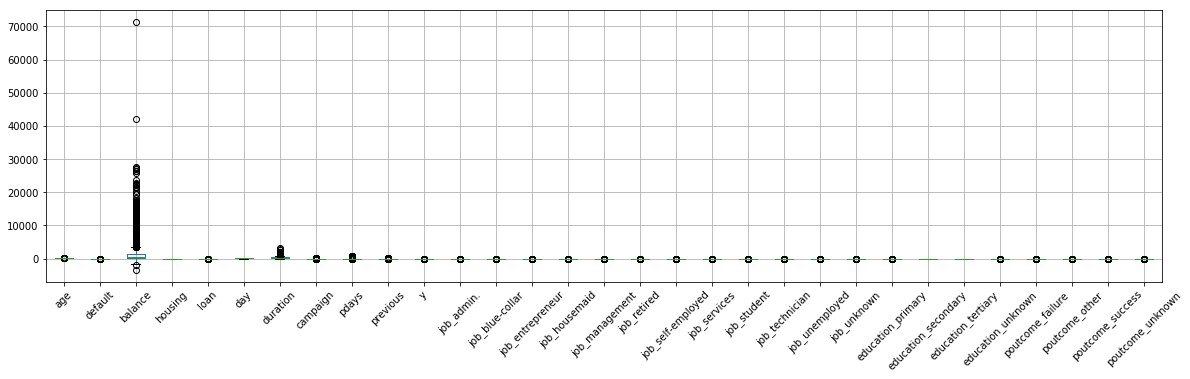

In [42]:
# sb.boxplot(data=df)
# check for ouliers
df.boxplot(rot=45, figsize=(20,5))

In [43]:
df.shape

(4521, 31)

In [44]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [45]:
df = Feature_Scaling(df)
df.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  0.161765      0.0  0.068455      0.0   0.0  0.600000  0.024826  0.000000   
1  0.205882      0.0  0.108750      1.0   1.0  0.333333  0.071500  0.000000   
2  0.235294      0.0  0.062590      1.0   0.0  0.500000  0.059914  0.000000   
3  0.161765      0.0  0.064281      1.0   1.0  0.066667  0.064548  0.061224   
4  0.588235      0.0  0.044469      1.0   0.0  0.133333  0.073486  0.000000   

      pdays  previous        ...         job_unemployed  job_unknown  \
0  0.000000      0.00        ...                    1.0          0.0   
1  0.389908      0.16        ...                    0.0          0.0   
2  0.379587      0.04        ...                    0.0          0.0   
3  0.000000      0.00        ...                    0.0          0.0   
4  0.000000      0.00        ...                    0.0          0.0   

   education_primary  education_secondary  education_tertiary  \
0                1.0                  0.0                 0.0   
1                0.0                  1.0                 0.0   
2                0.0                  0.0                 1.0   
3                0.0                  0.0                 1.0   
4                0.0                  1.0                 0.0   

   education_unknown  poutcome_failure  poutcome_other  poutcome_success  \
0                0.0               0.0             0.0               0.0   
1                0.0               1.0             0.0               0.0   
2                0.0               1.0             0.0               0.0   
3                0.0               0.0             0.0               0.0   
4                0.0               0.0             0.0               0.0   

   poutcome_unknown  
0               1.0  
1               0.0  
2               0.0  
3               1.0  
4               1.0  

[5 rows x 31 columns]

In [51]:
def Split(data):
    train=int(0.70*len(data))
    train_data=df.head(train)
#     print(train)
    test=int(0.30*len(data))
    test_data=df.tail(test)
   
    return train,test
train,test = Split(df)

In [56]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.y
    return df.drop('y', axis=1), output

x_train_data,y_train_data = separate(train_data)
x_test_data,y_test_data = separate(test_data)

# calling method by class object
    
x_train_data = np.array(x_train_data[:2000])
y_train_data = np.array(y_train_data[:2000])

x_test_data = np.array(x_test_data[:800])
y_test_data = np.array(y_test_data[:800])


In [59]:
import math
import operator

class KNN:
    def __init__(self):
        self.k=7
    
    
    def Euclidean(self,x_test_data,x_train_data,length):
        distance=0
        for i in range(length):
            distance+=pow(x_test_data[i]-x_train_data[i],2)
        return math.sqrt(distance)
    
    def get_neighbours(self,x_train_data,x_test_data,y_train_data):
        distance=[]
        length=len(x_test_data)-1
        for i in range(len(x_train_data)):
            dist=self.Euclidean(x_test_data,x_train_data[i],length)
            distance.append((y_train_data[i],dist))
            
        distance.sort(key=operator.itemgetter(1))
        neighbour=[]
        for i in range(self.k):
            neighbour.append(distance[i][0])
        return neighbour
        
        

    def getMajority(self,neighbors):
        majority = {}
        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in majority:
                majority[response] += 1
            else:
                majority[response] = 1
        majority = sorted(majority.items(), key=operator.itemgetter(1), reverse=True)
        return majority[0][0]
  
    def getAccuracy(self,y_test_data, predictions):
        correct = 0
        for x in range(len(y_test_data)):
            if y_test_data[x] == predictions[x]:
                correct += 1
        return (correct/float(len(y_test_data))) * 100.0

        
def main(x_train_data,y_train_data,x_test_data,y_test_data):
    obj = KNN()
    
    predictions=[]
    
    for i in range(len(x_test_data)):
        neighbours = obj.get_neighbours(x_train_data,x_test_data[i],y_train_data)
#         print(neighbours)
        result = obj.getMajority(neighbours)
    
        predictions.append(result)
        print(' predicted value= ' + repr(result) + ', actual value= ' + repr(y_test_data[i]))
        
    accuracy =obj.getAccuracy(y_test_data, predictions)
    print('\nAccuracy: ' + repr(accuracy) + '%')

if __name__ == '__main__':
    main(x_train_data,y_train_data,x_test_data,y_test_data)
    
    
    

 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 1.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value

 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 1.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 1.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value

 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value

 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 1.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value= 0.0, actual value= 0.0
 predicted value